# Importing

In [46]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

import cv2
from google.colab.patches import cv2_imshow
import os
import numpy as np


In [47]:
# Loading dataset

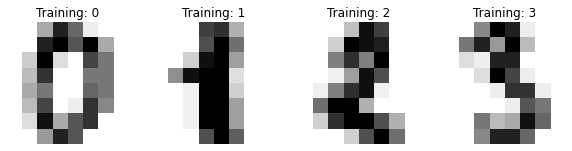

In [48]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# Training using sklearn model

In [49]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

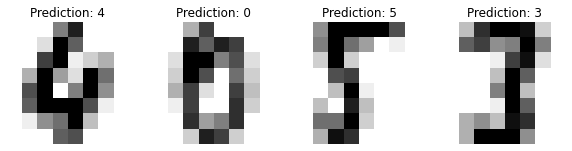

In [50]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

# Evaluate

In [51]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 52  1  0  0  0  0  0  0]
 [ 0  0  0 47  0  2  0  0  4  0]
 [ 0  0  0  0 54  0  0  0  1  2]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  1  0  0  0  0  0  0 51  0]
 [ 0  0  0  1  0  1  0  0  0 53]]


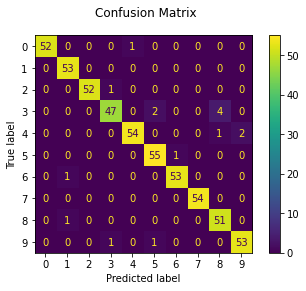

In [52]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Preprocessing 

In [53]:
def load_and_detect(path):
    image = cv2.imread(path)

    image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    image_blur = cv2.GaussianBlur(image_gray, (5, 5), 0)

    image_edged = cv2.Canny(image_blur, 50, 100)

    contours, hierarchy = cv2.findContours(image_edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
    x,y,w,h = cv2.boundingRect(biggest_contour)

    crop = image[y:y+h, x:x+w]
    return crop


def proprocessing(img):
    image_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    image_resize = cv2.resize(image_gray, (8,8))
    image_resize = 255 - image_resize
    image_reshape = image_resize.reshape(64, ).astype('float64')
    image_reshape /= 16

    return image_reshape

In [54]:
# Loading images
raw_images = []
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for label in labels:
    folder = os.path.join('/content/drive/MyDrive/CS114/raw_digits', str(label))
    for img in os.listdir(folder):
        path = os.path.join(folder, img)
        temp = load_and_detect(path)
        raw_images.append(temp)

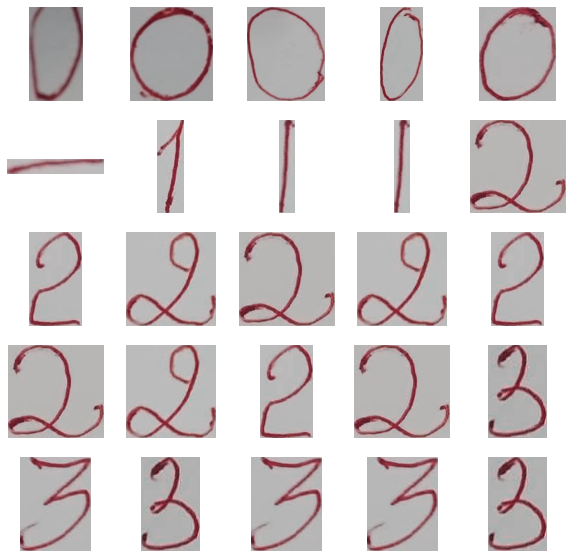

In [55]:
# Plotting
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(raw_images[i], cmap='gray')

In [56]:
# Preprocessing 
images = []
for image in raw_images: 
    temp = proprocessing(image)
    images.append(temp)

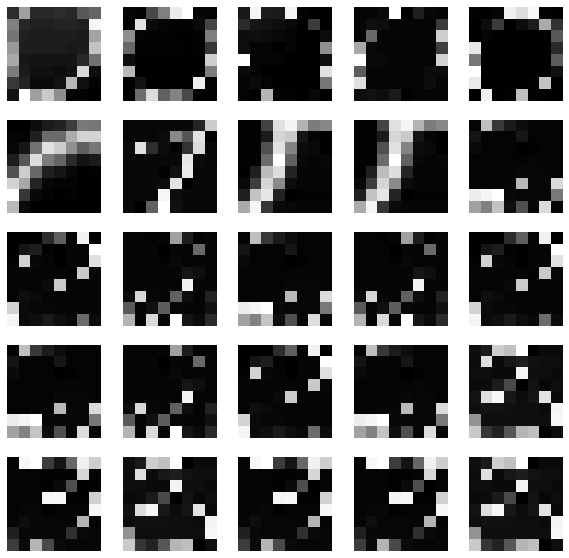

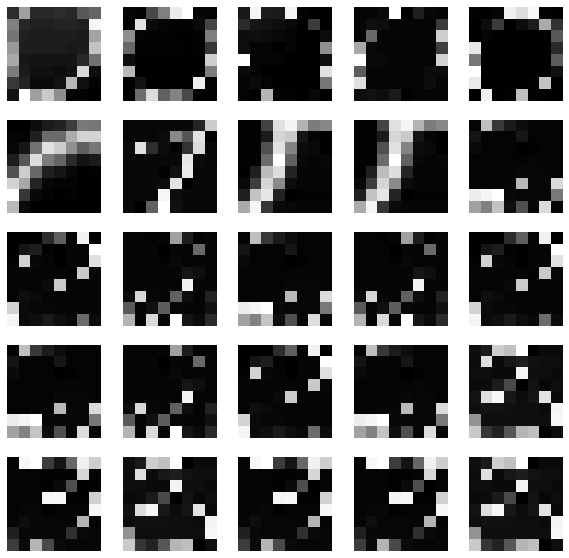

In [57]:
# Plotting
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    temp = images[i].reshape(8,8)
    plt.imshow(temp, cmap='gray')

# PREDICTION

In [58]:
predicted = clf.predict(images)
predicted

array([9, 5, 8, 8, 3, 9, 7, 8, 8, 8, 7, 3, 8, 3, 7, 8, 3, 7, 8, 3, 5, 3,
       5, 5, 3, 5, 3, 5, 3, 4, 9, 4, 4, 4, 9, 4, 4, 9, 4, 9, 9, 5, 9, 9,
       5, 9, 9, 5, 9, 1, 9, 9, 5, 9, 1, 5, 9, 9, 1, 9, 5, 9, 9, 9, 9, 9,
       5, 9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 9, 5, 9, 3, 5, 9, 3,
       5])